In [1]:
from create_data_single import Circ as cc
from dgcnsuq import DGCN as cn
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = cc(0.4, 0.4, 0.2, 26)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(5, 1, [100], [0.2], True, 10)

In [3]:
import torch
torch.manual_seed(26)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
pc.view(-1, pc.size(-1)).shape

torch.Size([280, 2])

In [5]:
training_data = pc.reshape(-1, pc.size(-1))
test_data = tc[0]
noise_var = 0.01
training_label = noise_var * torch.randn(training_data.size(0))
test_label = torch.Tensor(test_data.size(0))

In [6]:
training_data.shape

torch.Size([280, 2])

In [7]:
model = cn(training_data, test_data, training_label, test_label, False, 2, noise_var)

In [8]:
model.train_kernel(num_epochs=200, batch_size=20, learning_rate=0.00005, print_every=3)

/servers/ash/hdd-home3/dghosh/Documents/Thesis/1notebooks/dgcnsuq.py:9: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /opt/conda/conda-bld/pytorch_1724788960438/work/aten/src/ATen/native/TensorShape.cpp:3697.)
  dist_term = -0.5 * (label - mean).T @ torch.linalg.inv(variance) @ (label - mean)


Epoch:0, Loss: -12.150876453944615
Epoch:3, Loss: -13.918033639970593
Epoch:6, Loss: -14.701092297426836
Epoch:9, Loss: -15.508589219962497
Epoch:12, Loss: -16.331264730253967
Epoch:15, Loss: -17.061644747460825
Epoch:18, Loss: -17.748185014308614
Epoch:21, Loss: -18.457883362467562
Epoch:24, Loss: -19.25795165634179
Epoch:27, Loss: -20.22824303051334
Epoch:30, Loss: -21.459119915671657
Epoch:33, Loss: -22.733756182883536
Epoch:36, Loss: -23.447764901003833
Epoch:39, Loss: -23.74233519701806
Epoch:42, Loss: -24.03275553160838
Epoch:45, Loss: -24.293633169983398
Epoch:48, Loss: -24.409425901148428
Epoch:51, Loss: -24.488951149964723
Epoch:54, Loss: -24.557434334505064
Epoch:57, Loss: -24.61613499536623
Epoch:60, Loss: -24.661069130539165
Epoch:63, Loss: -24.69984710919427
Epoch:66, Loss: -24.736037472205805
Epoch:69, Loss: -24.764128302425565
Epoch:72, Loss: -24.792152433492298
Epoch:75, Loss: -24.8174765283895
Epoch:78, Loss: -24.842406888143046
Epoch:81, Loss: -24.869255728918034
Epoc

In [9]:
model.compute_posterior_batch(training_data, training_label, test_data, test_label, True)

(tensor([ 1.0374e-03,  8.1443e-04,  1.4714e-03,  3.3256e-04,  9.6276e-04,
          4.2473e-04,  6.0122e-04,  9.4434e-04,  4.4036e-04,  1.3074e-03,
          8.6817e-04,  8.2217e-04, -5.1387e-04,  1.3334e-03,  1.0360e-03,
          5.0926e-04,  1.0539e-03,  1.0176e-03,  4.7099e-04,  7.5402e-04,
          7.6494e-04, -4.9540e-05,  5.8791e-04,  6.8380e-04,  9.5179e-04,
          1.0387e-03,  1.0557e-03,  7.7008e-04,  5.4765e-04,  7.6111e-04,
          5.5409e-04,  1.1646e-03,  4.3441e-04,  6.6348e-04, -5.4063e-04,
          1.3171e-03,  1.2554e-03, -2.2258e-04,  8.0762e-04,  9.0725e-04,
          5.9365e-04,  8.7927e-04,  1.1313e-03,  8.0740e-04,  7.7876e-04,
          1.1049e-03,  1.0793e-03, -8.6817e-05,  4.4657e-04,  8.8825e-04,
          1.2621e-03, -5.5971e-04,  7.6884e-04,  5.1636e-04,  6.3644e-04,
          8.1549e-04], grad_fn=<MvBackward0>),
 tensor([[-8.5592e-05, -1.9652e-04, -1.9181e-04,  ..., -2.3985e-04,
          -2.1392e-04, -2.0128e-04],
         [ 1.6826e-04,  2.8288e-04

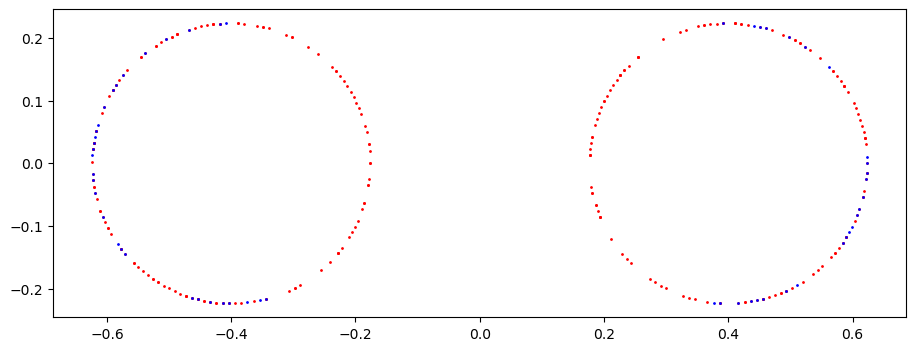

In [10]:
fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
ax.scatter(training_data.cpu().numpy()[:, 0], training_data.cpu().numpy()[:, 1], c='r', s=1)
ax.scatter(test_data.cpu().numpy()[:, 0], test_data.cpu().numpy()[:, 1], c='b', s=1)

Text(0.5, 1.0, 'Probability of being on the surface')

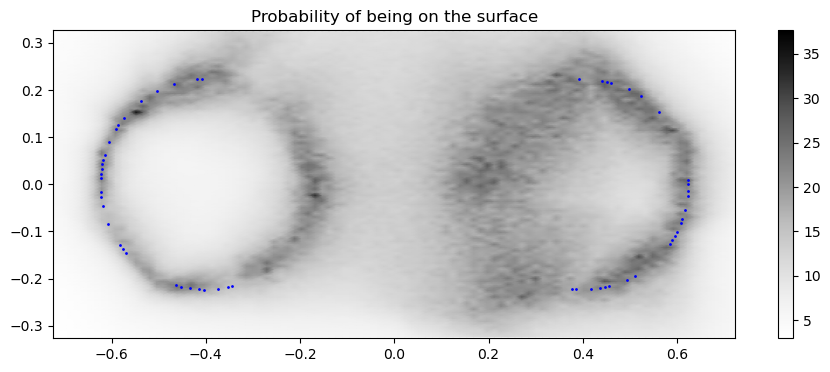

In [11]:
import numpy as np
from scipy.stats import norm
grid_sizes = np.ones(2, dtype=np.int32) * 100
def create_grid(box_min=None, box_max=None, eps=0.1):
    # find the bounding box for all dataset
    if box_min is None:
        box_min = torch.amin(test_data, 0) - eps
    if box_max is None:
        box_max = torch.amax(test_data, 0) + eps

    # Build a grid (dimension-agnostic)
    grid_vertices = np.meshgrid(
        *[np.linspace(box_min[d], box_max[d], grid_sizes[d]) for d in range(2)])
    grid_vertices = np.stack(grid_vertices, axis=-1).reshape(-1, 2)
    grid_vertices = torch.tensor(grid_vertices, dtype=torch.float32)
    return grid_vertices
grid_data = create_grid()
grid_label = torch.Tensor(grid_data.size(0))
training_label = noise_var * torch.randn(test_data.size(0))
pm, pv = model.compute_posterior_batch(test_data, training_label, grid_data, grid_label, True)
pd = torch.diagonal(pv, 0)
with torch.no_grad():
    prob_on_surface = norm.pdf(np.zeros(pm.shape), loc=pm.cpu().detach().numpy(),
                               scale=np.sqrt(pd.cpu().detach().numpy()))
gp = grid_data.cpu().numpy()
gp_x = gp[:, 0].reshape(grid_sizes)
gp_y = gp[:, 1].reshape(grid_sizes)
gp_prob = prob_on_surface.reshape(grid_sizes)

fig = plt.figure(figsize=(11, 4))
ax = fig.add_subplot(111)
plot = ax.pcolormesh(gp_x, gp_y, gp_prob, shading='gouraud', cmap='Greys')
ax.scatter(test_data.cpu().numpy()[:, 0], test_data.cpu().numpy()[:, 1], c='b', s=1)
fig.colorbar(plot)
ax.axis('equal')
ax.set_title(f'Probability of being on the surface')